In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os 
import re
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-04-15.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
4,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0


In [3]:
df.shape

(10947, 10)

In [4]:
df1 = df.loc[df.countriesAndTerritories=='United_States_of_America']
df1.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
10560,2020-04-15,15,4,2020,26922,2408,United_States_of_America,US,USA,327167434.0
10561,2020-04-14,14,4,2020,25023,1541,United_States_of_America,US,USA,327167434.0
10562,2020-04-13,13,4,2020,27620,1500,United_States_of_America,US,USA,327167434.0
10563,2020-04-12,12,4,2020,28391,1831,United_States_of_America,US,USA,327167434.0
10564,2020-04-11,11,4,2020,35527,2087,United_States_of_America,US,USA,327167434.0


In [6]:
df1.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
10560,2020-04-15,15,4,2020,26922,2408,United_States_of_America,US,USA,327167434.0
10561,2020-04-14,14,4,2020,25023,1541,United_States_of_America,US,USA,327167434.0
10562,2020-04-13,13,4,2020,27620,1500,United_States_of_America,US,USA,327167434.0
10563,2020-04-12,12,4,2020,28391,1831,United_States_of_America,US,USA,327167434.0
10564,2020-04-11,11,4,2020,35527,2087,United_States_of_America,US,USA,327167434.0


In [7]:
df3=df1[:86]
df3.shape

(86, 10)

In [12]:
df1["countriesAndTerritories"].unique()

array(['United_States_of_America'], dtype=object)

In [13]:
df4=df1[df1["countriesAndTerritories"]=="United_States_of_America"]

In [14]:
df4.shape

(107, 10)

In [23]:
df3.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
10641,2020-01-25,25,1,2020,1,0,United_States_of_America,US,USA,327167434.0
10642,2020-01-24,24,1,2020,0,0,United_States_of_America,US,USA,327167434.0
10643,2020-01-23,23,1,2020,0,0,United_States_of_America,US,USA,327167434.0
10644,2020-01-22,22,1,2020,0,0,United_States_of_America,US,USA,327167434.0
10645,2020-01-21,21,1,2020,1,0,United_States_of_America,US,USA,327167434.0


In [18]:
df_1 = df3.iloc[::-1]

In [19]:
df_1.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
10645,2020-01-21,21,1,2020,1,0,United_States_of_America,US,USA,327167434.0
10644,2020-01-22,22,1,2020,0,0,United_States_of_America,US,USA,327167434.0
10643,2020-01-23,23,1,2020,0,0,United_States_of_America,US,USA,327167434.0
10642,2020-01-24,24,1,2020,0,0,United_States_of_America,US,USA,327167434.0
10641,2020-01-25,25,1,2020,1,0,United_States_of_America,US,USA,327167434.0


In [24]:
df_1['timeline'] = np.arange(1,87)
print (df_1)

         dateRep  day  month  year  cases  deaths   countriesAndTerritories  \
10645 2020-01-21   21      1  2020      1       0  United_States_of_America   
10644 2020-01-22   22      1  2020      0       0  United_States_of_America   
10643 2020-01-23   23      1  2020      0       0  United_States_of_America   
10642 2020-01-24   24      1  2020      0       0  United_States_of_America   
10641 2020-01-25   25      1  2020      1       0  United_States_of_America   
10640 2020-01-26   26      1  2020      0       0  United_States_of_America   
10639 2020-01-27   27      1  2020      3       0  United_States_of_America   
10638 2020-01-28   28      1  2020      0       0  United_States_of_America   
10637 2020-01-29   29      1  2020      0       0  United_States_of_America   
10636 2020-01-30   30      1  2020      0       0  United_States_of_America   
10635 2020-01-31   31      1  2020      1       0  United_States_of_America   
10634 2020-02-01    1      2  2020      1       0  U

C:\Users\A801518\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_2 = df_1[['timeline','cases']]
df_2.head()

,timeline,cases
10645,1,1
10644,2,0
10643,3,0
10642,4,0
10641,5,1


In [62]:
df_2.head()

,timeline,cases,total_cases,logcases,Predicted
10645,1,1,1,0.000000,1.0
10644,2,0,1,0.000000,1.2
10643,3,0,1,0.000000,1.4
10642,4,0,1,0.000000,1.7
10641,5,1,2,0.693147,2.0


In [27]:
df_2['total_cases']=df_2['cases'].cumsum()

C:\Users\A801518\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_2.head()

,timeline,cases,total_cases,logcases,Predicted
10645,1,1,1,0.000000,1.0
10644,2,0,1,0.000000,1.2
10643,3,0,1,0.000000,1.4
10642,4,0,1,0.000000,1.7
10641,5,1,2,0.693147,2.0


In [29]:
df_2['logcases']=np.log(df_2.total_cases)

C:\Users\A801518\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_2.head()

,timeline,cases,total_cases,logcases,Predicted
10645,1,1,1,0.000000,1.027471
10644,2,0,1,0.000000,1.219694
10643,3,0,1,0.000000,1.447879
10642,4,0,1,0.000000,1.718755
10641,5,1,2,0.693147,2.040306


In [31]:
df_2.corr()

,timeline,cases,total_cases,logcases
timeline,1.000000,0.793183,0.713319,0.977041
cases,0.793183,1.000000,0.905183,0.853784
total_cases,0.713319,0.905183,1.000000,0.742222
logcases,0.977041,0.853784,0.742222,1.000000


In [33]:
import statsmodels.api as sm

In [34]:
X = df_2["timeline"]
X =sm.add_constant(X)
y = df_2["logcases"]
X.head()

C:\Users\A801518\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,timeline
10645,1.0,1
10644,1.0,2
10643,1.0,3
10642,1.0,4
10641,1.0,5


In [35]:
est=sm.OLS(y, X)

In [36]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logcases   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1767.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           3.48e-58
Time:                        08:35:21   Log-Likelihood:                -115.64
No. Observations:                  86   AIC:                             235.3
Df Residuals:                      84   BIC:                             240.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1444      0.204     -5.600      0.000      -1.551      -0.738
timeline       0.1715      0.004     42.031      0.000       0.163       0.180
==============================================================================
Omnibus:                       39.342   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.410
Skew:                          -0.334   Prob(JB):                       0.0246
Kurtosis:                       1.727   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
import math 


def expp(dff):
    return(round(math.exp(-0.1444+0.1715*dff['timeline']),1))

In [54]:
df_2["Predicted"]=df_2.apply(expp,axis=1)

C:\Users\A801518\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_2.head()

,timeline,cases,total_cases,logcases,Predicted
10645,1,1,1,0.000000,1.0
10644,2,0,1,0.000000,1.2
10643,3,0,1,0.000000,1.4
10642,4,0,1,0.000000,1.7
10641,5,1,2,0.693147,2.0


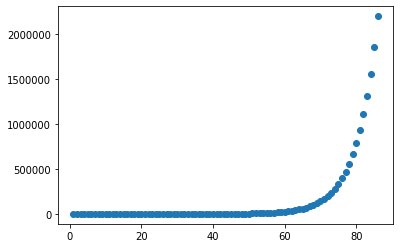

In [59]:
plt.scatter(df_2["timeline"],df_2["Predicted"])
plt.show()

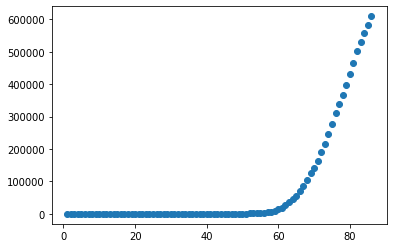

In [60]:
plt.scatter(df_2["timeline"],df_2["total_cases"])
plt.show()

In [47]:
import math 


def expp(dff):
    return(math.exp(-0.1444+0.1715*dff['timeline']))

In [48]:
np.round(df_2.apply(expp,axis=1),1)

10645          1.0
10644          1.2
10643          1.4
10642          1.7
10641          2.0
10640          2.4
10639          2.9
10638          3.4
10637          4.1
10636          4.8
10635          5.7
10634          6.8
10633          8.0
10632          9.6
10631         11.3
10630         13.5
10629         16.0
10628         19.0
10627         22.5
10626         26.7
10625         31.7
10624         37.7
10623         44.7
10622         53.1
10621         63.0
10620         74.8
10619         88.8
10618        105.4
10617        125.1
10616        148.5
           ...    
10589      15231.2
10588      18080.7
10587      21463.3
10586      25478.7
10585      30245.4
10584      35903.9
10583      42620.9
10582      50594.6
10581      60060.0
10580      71296.3
10579      84634.7
10578     100468.5
10577     119264.6
10576     141577.1
10575     168064.0
10574     199506.1
10573     236830.5
10572     281137.7
10571     333734.2
10570     396170.5
10569     470287.7
10568     55

In [ ]:
logcases=-0.1444+0.1715*timeline

In [ ]:
cases=e

In [23]:
pred = est.predict()
print(pred)

[-0.9729265  -0.80142388 -0.62992126 -0.45841865 -0.28691603 -0.11541341
  0.05608921  0.22759183  0.39909444  0.57059706  0.74209968  0.9136023
  1.08510491  1.25660753  1.42811015  1.59961277  1.77111538  1.942618
  2.11412062  2.28562324  2.45712585  2.62862847  2.80013109  2.97163371
  3.14313632  3.31463894  3.48614156  3.65764418  3.8291468   4.00064941
  4.17215203  4.34365465  4.51515727  4.68665988  4.8581625   5.02966512
  5.20116774  5.37267035  5.54417297  5.71567559  5.88717821  6.05868082
  6.23018344  6.40168606  6.57318868  6.74469129  6.91619391  7.08769653
  7.25919915  7.43070176  7.60220438  7.773707    7.94520962  8.11671224
  8.28821485  8.45971747  8.63122009  8.80272271  8.97422532  9.14572794
  9.31723056  9.48873318  9.66023579  9.83173841 10.00324103 10.17474365
 10.34624626 10.51774888 10.6892515  10.86075412 11.03225673 11.20375935
 11.37526197 11.54676459 11.71826721 11.88976982 12.06127244 12.23277506
 12.40427768 12.57578029 12.74728291 12.91878553 13.09

In [24]:
res = est.resid
print(res)

10645    0.972926
10644    0.801424
10643    0.629921
10642    0.458419
10641    0.980063
10640    0.808561
10639    1.553349
10638    1.381846
10637    1.210343
10636    1.038841
10635    1.049660
10634    1.032308
10633    0.994337
10632    1.141288
10631    0.969785
10630    0.798283
10629    0.713791
10628    0.542289
10627    0.370786
10626    0.199283
10625    0.027781
10624   -0.063679
10623   -0.235182
10622   -0.332576
10621   -0.435086
10620   -0.606589
10619   -0.778091
10618   -0.949594
10617   -1.121097
10616   -1.292599
           ...   
10589   -0.184235
10588   -0.034460
10587    0.175834
10586    0.418784
10585    0.567278
10584    0.705444
10583    0.808736
10582    0.914221
10581    0.916039
10580    0.969926
10579    1.015752
10578    1.040972
10577    1.044134
10576    1.010021
10575    0.979138
10574    0.949007
10573    0.911104
10572    0.864451
10571    0.816983
10570    0.761748
10569    0.668448
10568    0.583596
10567    0.491960
10566    0.400706
10565    0

In [ ]:
plt.scatter(testgw_feature.Temp, testpred)
plt.show()

In [ ]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
model.summary()


X = df1["cases"]
y = df1["deaths"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

#model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
#model.summary()

In [ ]:
df_1.insert(4, "time",,True)

Lets find the correlation of the data and look at the variables which are in ralation

In [ ]:
df1.corr()

In [ ]:
sns.heatmap(df1.corr(), annot=True)

Lets Create a pairplot to explore more about the realtionship

In [ ]:
sns.pairplot(df1)


In [ ]:
sns.jointplot(df1.cases, df1.deaths )

In [ ]:
df1.plot(x='cases', y='deaths', style='o')  
plt.title('cases vs deaths')  
plt.xlabel('cases')  
plt.ylabel('deaths')  
plt.show()

# As we can see there is some positive relationship in between cases and deaths

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df1['deaths'])

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df1["cases"]
y = df1["deaths"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


# The coefficient of 0.0467 means that as the cases variable increases by 1, the predicted value of deaths increases by 0.0467 

In [ ]:
model.conf_int(alpha=0.05, cols=None)


In [ ]:
we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759

In [ ]:
from sklearn import linear_model

In [ ]:
X = df1["cases"]
y = df1["deaths"]



In [ ]:
lm = linear_model.LinearRegression()


In [ ]:
model = lm.fit(y,X)